In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import art

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]

random_state = 0

In [3]:
X, y = make_blobs(n_samples=300, n_features=2, centers=2, 
                  random_state=random_state, cluster_std=1.0)

# scaling to [-1, 1] range
X_max = np.max(X, axis=0)
X_min = np.min(X, axis=0)
X = 1 - 2 * (X - X_min)/(X_max - X_min)

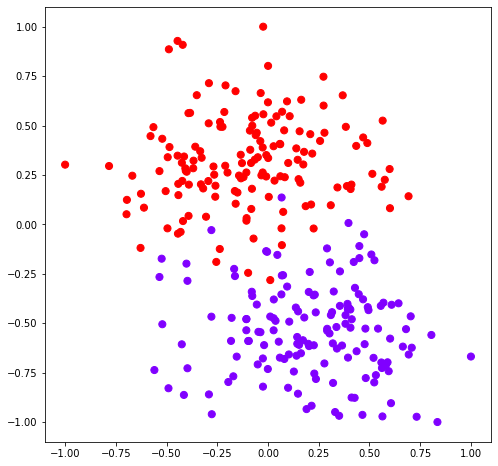

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [5]:
model = SVC(kernel='rbf')
model.fit(X,y)

SVC()

In [6]:
model.score(X, y)

0.97

In [16]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, 
               clim=(y.min(), y.max()), zorder=3)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

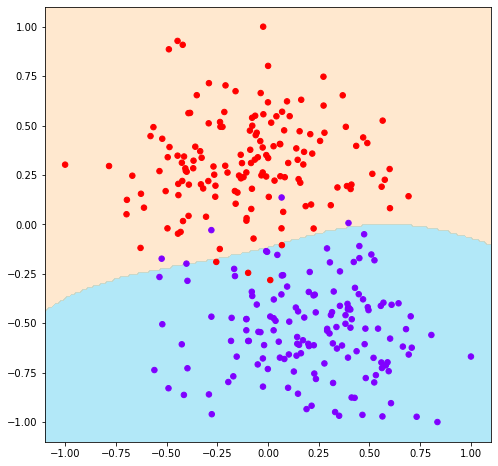

In [17]:
visualize_classifier(model, X, y)

In [9]:
X_max

array([4.75149157, 6.36828019])

In [10]:
SklearnClassifier = art.estimators.classification.SklearnClassifier

In [11]:
classifier = SklearnClassifier(model=model, clip_values=(X_min, X_max))

In [12]:
predictions = classifier.predict(X)  # one-hot encoding
predictions.shape

(300, 2)

In [13]:
FGSM = art.attacks.evasion.FastGradientMethod
attack = FGSM(estimator=classifier, eps=0.2)
adv = attack.generate(x=X)
predictions = np.argmax(classifier.predict(adv), axis=1)
acc = np.sum(predictions == model.predict(X)) / len(y)
acc

0.82

In [14]:
BoundaryAttack = art.attacks.evasion.BoundaryAttack
attack = BoundaryAttack(estimator=classifier, targeted=False, max_iter=1000, num_trial=20)
adv = attack.generate(x=X)
predictions = np.argmax(classifier.predict(adv), axis=1)
acc = np.sum(predictions == model.predict(X)) / len(y)
acc

Boundary attack: 100%|██████████| 300/300 [05:42<00:00,  1.14s/it]


0.0

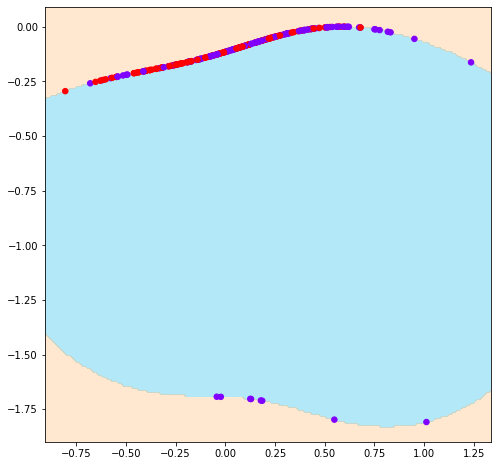

In [18]:
visualize_classifier(model, adv, y)